## Cross validation

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [0.8551132544696867, 0.8551132544696867, 0.8304543621454497, 0.8406455840838823, 0.8536597660975938, 0.834806425594838, 0.8203303535421428, 0.8101727382712731, 0.8174317784648475, 0.7985532329614196, 0.7971333512568894, 0.8087276515660707, 0.7970997445893265, 0.7985532329614196, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335, 0.7956462562172335]


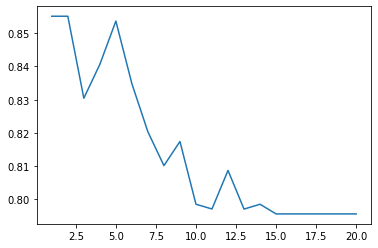

The best accuracy of CART is 0.8551132544696867 and the corresponding depth is 1


In [23]:
%matplotlib inline 
from sklearn.model_selection import cross_val_score

score_list = []
depths = []

for dep in range(1,21):
    depths.append(dep)
    clf_cross = DecisionTreeClassifier(
        max_depth = dep, max_leaf_nodes = 2**dep, random_state = 7021)
    scores = cross_val_score(clf_cross, X_1, y_1, cv=4)
    score_list.append(scores.mean())

print(depths,score_list)

plt.plot(depths,score_list)
plt.show()

print('The best accuracy of CART is', max(score_list),'and the corresponding depth is',score_list.index(max(score_list))+1)

## CART

In [24]:
depth = 1

In [25]:
clf_1 = DecisionTreeClassifier(
    max_depth = depth, max_leaf_nodes = 2**depth, random_state = 7021)
clf_1.fit(X_train_1, y_train_1)


DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, random_state=7021)

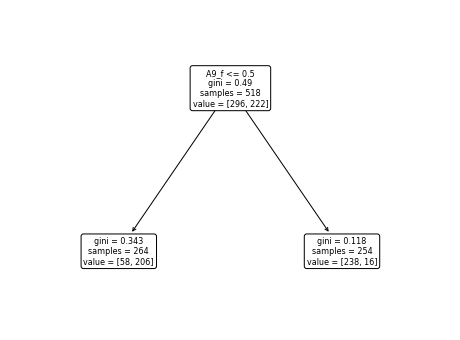

In [26]:
fig_1 = plt.figure(figsize = (8, 6))
_ = plot_tree(
    clf_1, filled = False, fontsize = 8, rounded = True, feature_names = tuple(df_1_final.columns[0:-1]))
fig_1.savefig('CART_1.png')

In [27]:
print(export_text(clf_1, feature_names = tuple(df_1_final.columns[0:-1])))

|--- A9_f <= 0.50
|   |--- class: 1
|--- A9_f >  0.50
|   |--- class: 0



In [28]:
def find_path(root, path, x, children_left, children_right):
    path.append(root)
    if root == x:
        return True
    left = False
    right = False
    if (children_left[root] != -1):
        left = find_path(children_left[root], path, x, children_left, children_right)
    if (children_right[root] != -1):
        right = find_path(children_right[root], path, x, children_left, children_right)
    if left or right:
        return True
    path.remove(root)
    return False

def get_rule(path, children_left, attributes, feature, threshold):
    mask = ''
    for idx, node in enumerate(path):
        # filter out the leaf node
        if idx != len(path) - 1:
            # left or right branch node
            if (children_left[node] == path[idx + 1]):
                mask += "('{}' <= {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
            else:
                mask += "('{}' > {:.2f}) \t ".format(
                    attributes[feature[node]], threshold[node])
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "").strip()
    return mask

In [29]:
children_left_1 = clf_1.tree_.children_left
children_right_1 = clf_1.tree_.children_right
feature_1 = clf_1.tree_.feature
threshold_1 = clf_1.tree_.threshold

In [30]:
leaf_id_1 = np.unique(clf_1.apply(X_train_1))

paths_1 = {}
for leaf in leaf_id_1:
    path_leaf = []
    find_path(0, path_leaf, leaf, children_left_1, children_right_1)
    paths_1[leaf] = path_leaf

CART_rules_1 = {}
for leaf in paths_1:
    CART_rules_1[leaf] = get_rule(paths_1[leaf], children_left_1, tuple(df_1_final.columns[0:-1]), feature_1, threshold_1)

In [31]:
leaf_id_1

array([1, 2], dtype=int64)

In [32]:
CART_rules_1

{1: "('A9_f' <= 0.50)", 2: "('A9_f' > 0.50)"}

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [34]:
total_nodes_1 = clf_1.tree_.node_count
leaf_nodes_1 = round(total_nodes_1 / 2)
branch_nodes_1 = total_nodes_1 // 2

In [35]:
initial_a_1 = np.array([i for i in clf_1.tree_.feature if i != -2])
initial_a_1

array([32], dtype=int64)

In [36]:
initial_b_1 = np.array([i for i in clf_1.tree_.threshold if i != -2])
initial_b_1

array([0.5])

In [37]:
clf_1.score(X_train_1, y_train_1)

0.8571428571428571

In [38]:
clf_1.score(X_test_1, y_test_1)

0.8488372093023255

### Rules and performance of CART

In [39]:
print('The decision rules in CART is ', CART_rules_1)
print('\nThe in-sample performance in CART is', clf_1.score(X_train_1, y_train_1))
print('\nThe out-of-sample performance in CART is', clf_1.score(X_test_1, y_test_1))

The decision rules in CART is  {1: "('A9_f' <= 0.50)", 2: "('A9_f' > 0.50)"}

The in-sample performance in CART is 0.8571428571428571

The out-of-sample performance in CART is 0.8488372093023255
